In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# b

filePath = "DuLieuThucHanh2_K66_GuiSV_V1.xlsx"

df_sinh_vien = pd.read_excel(filePath, sheet_name='Sinh Vien')
df_diem_mon_1 = pd.read_excel(filePath, sheet_name='Diem Mon 1')
df_diem_mon_2 = pd.read_excel(filePath, sheet_name='Diem Mon 2')
df_diem_mon_3 = pd.read_excel(filePath, sheet_name='Diem Mon 3')


print(df_sinh_vien.to_string())
print(df_diem_mon_1.to_string())
print(df_diem_mon_2.to_string())
print(df_diem_mon_3.to_string())

print(df_sinh_vien.info())
print(df_diem_mon_1.info())
print(df_diem_mon_2.info())
print(df_diem_mon_3.info())

    STT  Ma Sinh Vien            Ho Ten  Ngay Sinh Gioi Tinh Lop Quan Ly
0     1        189456   Hoang Minh Giam 2003-05-11       Nam       66PM1
1     2        198436   Nguyen Duc Tuan 2003-06-17       Nam       66PM5
2     3        208472  Huynh Minh Thanh 2003-01-21       Nam      66MHT1
3     4        189459      Nguyen Van A 2003-01-22       Nam      66MHT2
4     5        189460      Nguyen Van B 2003-01-23       Nam      66MHT3
5     6        189461      Nguyen Van C 2003-01-24        Nữ      66MHT4
6     7        189462      Nguyen Van D 2003-01-25       Nam      66MHT5
7     8        189463      Nguyen Van E 2003-01-26       Nam      66MHT6
8     9        189464      Nguyen Van F 2003-01-27       Nam       66PM1
9    10        189465      Nguyen Van G 2003-01-28        Nữ       66PM2
10   11        189466      Nguyen Van H 2003-01-29       Nam       66PM3
11   12        189467      Nguyen Van I 2003-01-30       Nam       66PM4
12   13        189468      Nguyen Van J 2003-01-31 

In [16]:
# c

df_tong_hop = pd.read_excel(filePath)

df_tong_hop = pd.merge(df_sinh_vien, df_diem_mon_1, on=['Ma Sinh Vien', 'STT', 'Ho Ten'])

df_tong_hop = pd.merge(df_tong_hop, df_diem_mon_2, on='Ma Sinh Vien', suffixes=('_1', '_2'))
df_tong_hop = pd.merge(df_tong_hop, df_diem_mon_3, on='Ma Sinh Vien')
df_tong_hop = df_tong_hop.rename(columns={'Diem Cuoi Ky': 'Diem Cuoi Ky_3'})
df_tong_hop = df_tong_hop.rename(columns={'Diem Qua Trinh': 'Diem Qua Trinh_3'})

df_tong_hop['Diem Tong Ket_1'] = df_tong_hop['Diem Qua Trinh_1']*0.3 + df_tong_hop['Diem Cuoi Ky_1']*0.7
df_tong_hop['Diem Tong Ket_2'] = df_tong_hop['Diem Qua Trinh_2']*0.3 + df_tong_hop['Diem Cuoi Ky_2']*0.7
df_tong_hop['Diem Tong Ket_3'] = df_tong_hop['Diem Qua Trinh_3']*0.3 + df_tong_hop['Diem Cuoi Ky_3']*0.7
df_tong_hop['Diem Trung Binh'] = (df_tong_hop['Diem Tong Ket_1'] + df_tong_hop['Diem Tong Ket_2'] + df_tong_hop['Diem Tong Ket_3']) / 3

df_tong_hop = df_tong_hop[['Ma Sinh Vien', 'Ho Ten', 'Ngay Sinh', 'Gioi Tinh', 'Lop Quan Ly', 'Diem Qua Trinh_1', 'Diem Cuoi Ky_1', 'Diem Tong Ket_1', 'Diem Qua Trinh_2', 'Diem Cuoi Ky_2', 'Diem Tong Ket_2', 'Diem Qua Trinh_3', 'Diem Cuoi Ky_3', 'Diem Tong Ket_3', 'Diem Trung Binh']]

print(df_tong_hop)

    Ma Sinh Vien            Ho Ten  Ngay Sinh Gioi Tinh Lop Quan Ly  \
0         189456   Hoang Minh Giam 2003-05-11       Nam       66PM1   
1         198436   Nguyen Duc Tuan 2003-06-17       Nam       66PM5   
2         208472  Huynh Minh Thanh 2003-01-21       Nam      66MHT1   
3         189459      Nguyen Van A 2003-01-22       Nam      66MHT2   
4         189460      Nguyen Van B 2003-01-23       Nam      66MHT3   
5         189461      Nguyen Van C 2003-01-24        Nữ      66MHT4   
6         189462      Nguyen Van D 2003-01-25       Nam      66MHT5   
7         189463      Nguyen Van E 2003-01-26       Nam      66MHT6   
8         189464      Nguyen Van F 2003-01-27       Nam       66PM1   
9         189465      Nguyen Van G 2003-01-28        Nữ       66PM2   
10        189466      Nguyen Van H 2003-01-29       Nam       66PM3   
11        189467      Nguyen Van I 2003-01-30       Nam       66PM4   
12        189468      Nguyen Van J 2003-01-31        Nữ       66PM5   
13    

In [17]:
# d

df_diem_mon_1_filtered = df_tong_hop[['Ma Sinh Vien', 'Ho Ten', 'Diem Tong Ket_1']]
df_diem_mon_2_filtered = df_tong_hop[['Ma Sinh Vien', 'Ho Ten', 'Diem Tong Ket_2']]
df_diem_mon_3_filtered = df_tong_hop[['Ma Sinh Vien', 'Ho Ten', 'Diem Tong Ket_3']]

df_khong_qua_mon_1 = df_diem_mon_1_filtered[df_diem_mon_1_filtered['Diem Tong Ket_1'] < 4.0]
df_khong_qua_mon_2 = df_diem_mon_2_filtered[df_diem_mon_2_filtered['Diem Tong Ket_2'] < 4.0]
df_khong_qua_mon_3 = df_diem_mon_3_filtered[df_diem_mon_3_filtered['Diem Tong Ket_3'] < 4.0]

print("Danh sách sinh viên không qua môn theo từng môn:")
print("Môn 1:")
print(df_khong_qua_mon_1.to_string(index=False))
print("\nMôn 2:")
print(df_khong_qua_mon_2.to_string(index=False))
print("\nMôn 3:")
print(df_khong_qua_mon_3.to_string(index=False))

Danh sách sinh viên không qua môn theo từng môn:
Môn 1:
 Ma Sinh Vien       Ho Ten  Diem Tong Ket_1
       189467 Nguyen Van I             3.70
       189468 Nguyen Van J             3.90
       189469 Nguyen Van K             3.80
       189471 Nguyen Van M             3.65
       189472 Nguyen Van N             3.55

Môn 2:
 Ma Sinh Vien          Ho Ten  Diem Tong Ket_2
       198436 Nguyen Duc Tuan              2.9
       189460    Nguyen Van B              2.9
       189465    Nguyen Van G              2.3
       189470    Nguyen Van L              3.8
       189474    Nguyen Van P              3.3

Môn 3:
 Ma Sinh Vien          Ho Ten  Diem Tong Ket_3
       189456 Hoang Minh Giam             3.75
       189463    Nguyen Van E             3.75
       189466    Nguyen Van H             3.40
       189472    Nguyen Van N             3.05


In [18]:
# e

df_khong_bi_truot_mon = df_tong_hop[(df_tong_hop['Diem Tong Ket_1'] >= 4.0) & (df_tong_hop['Diem Tong Ket_2'] >= 4.0) & (df_tong_hop['Diem Tong Ket_3'] >= 4.0)]

print("Danh sách sinh viên không bị trượt môn:")
print(df_khong_bi_truot_mon.to_string(index=False))

Danh sách sinh viên không bị trượt môn:
 Ma Sinh Vien           Ho Ten  Ngay Sinh Gioi Tinh Lop Quan Ly  Diem Qua Trinh_1  Diem Cuoi Ky_1  Diem Tong Ket_1  Diem Qua Trinh_2  Diem Cuoi Ky_2  Diem Tong Ket_2  Diem Qua Trinh_3  Diem Cuoi Ky_3  Diem Tong Ket_3  Diem Trung Binh
       208472 Huynh Minh Thanh 2003-01-21       Nam      66MHT1               8.5             6.0             6.75               8.0             6.0             6.60               8.0             5.0             5.90         6.416667
       189459     Nguyen Van A 2003-01-22       Nam      66MHT2               7.0             7.0             7.00              10.0             8.0             8.60               7.5             9.0             8.55         8.050000
       189461     Nguyen Van C 2003-01-24        Nữ      66MHT4               9.0            10.0             9.70               7.5             6.0             6.45               7.0             5.0             5.60         7.250000
       189462     Nguyen

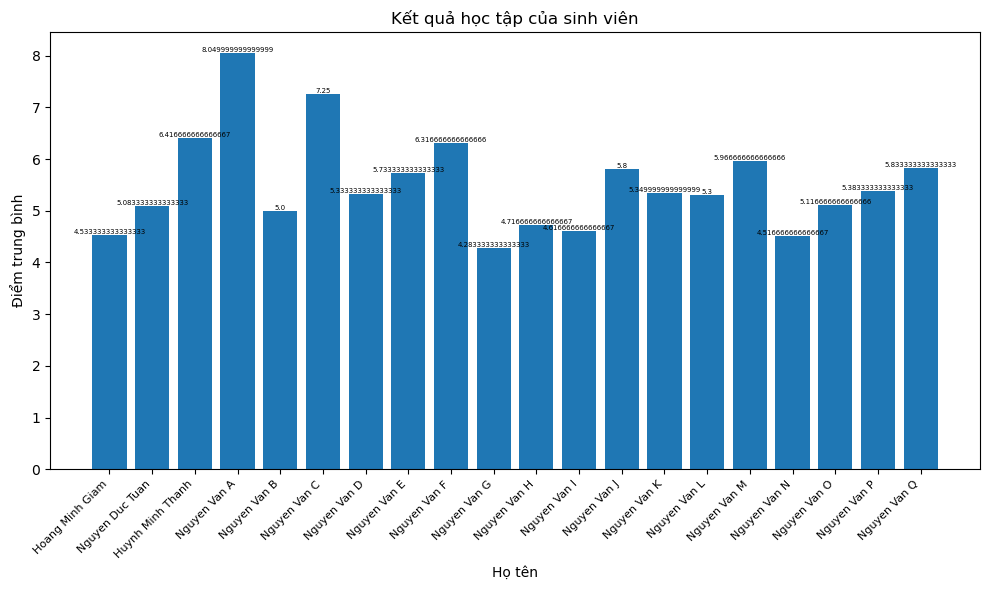

In [28]:
# f

diem_trung_binh = df_tong_hop["Diem Trung Binh"].to_list()

ten_sinh_vien = df_tong_hop["Ho Ten"].to_list()

plt.figure(figsize=(10, 6))

bars = plt.bar(ten_sinh_vien, diem_trung_binh)

plt.title("Kết quả học tập của sinh viên")
plt.xlabel("Họ tên")
plt.ylabel("Điểm trung bình")

plt.xticks(rotation=45, ha='right', fontsize=8)

for bar, diem in zip(bars, diem_trung_binh):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{diem}', ha='center', va='bottom', fontsize=5)

plt.tight_layout()
plt.show()

# => dùng biểu đồ cột vì dễ hiểu và so sánh, dễ phân loại dữ liệu và dễ đọc trực quan. (chi tiết sẽ viết trong báo cáo)

In [20]:
# g

outputFilePath = "N07_LTUDKT_66PM56_BTNhomSo2.xlsx"

with pd.ExcelWriter(outputFilePath) as writer:
    df_sinh_vien.to_excel(writer, sheet_name='Sinh Vien', index=False)
    df_diem_mon_1.to_excel(writer, sheet_name='Diem Mon 1', index=False)
    df_diem_mon_2.to_excel(writer, sheet_name='Diem Mon 2', index=False)
    df_diem_mon_3.to_excel(writer, sheet_name='Diem Mon 3', index=False)
    df_tong_hop.to_excel(writer, sheet_name='Tong Hop', index=False)
    df_khong_qua_mon_1.to_excel(writer, sheet_name='Khong Qua Mon 1', index=False)
    df_khong_qua_mon_2.to_excel(writer, sheet_name='Khong Qua Mon 2', index=False)
    df_khong_qua_mon_3.to_excel(writer, sheet_name='Khong Qua Mon 3', index=False)
    df_khong_bi_truot_mon.to_excel(writer, sheet_name='Khong Bi Truot Mon', index=False)